## 제21대 국회의원선거 분석

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [2]:
# !pip install selenium
from selenium import webdriver
import time

### 데이터 크롤링

In [3]:
# 중앙선거관리위원회 선거통계시스템 사이트 접속
driver = webdriver.Chrome('../chromedriver')
driver.get('http://info.nec.go.kr/')

In [4]:
# iFrame(html안에 또 다른 html이 있는)으로 작성된 사이트의 경우, 적합한 frame을 찾아야 한다
# 크롬 개발자 도구(F12) -> Sources탭에서 frame 확인
driver.switch_to.default_content()
driver.switch_to.frame('main')

In [5]:
# 투/개표 클릭
xpath = """//*[@id="topmenu"]/ul/li[4]/a"""
driver.find_element_by_xpath(xpath).click()

In [6]:
# 개표단위별 개표결과 클릭 
xpath = """//*[@id="gnb"]/div[4]/ul/li[4]/a"""
driver.find_element_by_xpath(xpath).click()

In [7]:
# 국회의원 선거 클릭
xpath = """//*[@id="electionId2"]"""
driver.find_element_by_xpath(xpath).click()

In [8]:
# 시도 드랍다운 콤보박스 접근 후 option 태그에서 시도 정보 가져오기
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name('option')
sido_names = [option.text for option in sido_list]
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [9]:
# '서울특별시'가 선택되는지 확인
element = driver.find_element_by_id('cityCode')
element.send_keys(sido_names[0])

In [10]:
# 선거구(시도) 드랍다운 콤보박스 접근 후 option 태그에서 시도 정보 가져오기
sigun_list_raw = driver.find_element_by_xpath("""//*[@id="sggCityCode"]""")
sigun_list = sigun_list_raw.find_elements_by_tag_name('option')
sigun_names = [option.text for option in sigun_list]
sigun_names = sigun_names[1:]
sigun_names[:5]

['종로구', '중구성동구갑', '중구성동구을', '용산구', '광진구갑']

In [11]:
# '종로구'가 선택되는지 확인
element = driver.find_element_by_id('sggCityCode')
element.send_keys(sigun_names[0])

In [12]:
# 선거구(구시군) 드랍다운 콤보박스 접근 후 option 태그에서 도시 정보 가져오기
town_list_raw = driver.find_element_by_xpath("""//*[@id="townCodeFromSgg"]""")
town_list = town_list_raw.find_elements_by_tag_name('option')
town_names = [option.text for option in town_list]
town_names = town_names[1:]
town_names

['종로구']

In [13]:
# '종로구'가 선택되는지 확인
element = driver.find_element_by_id('townCodeFromSgg')
element.send_keys(sigun_names[0])

In [14]:
# 검색 버튼 클릭
xpath = """//*[@id="spanSubmit"]/input"""
driver.find_element_by_xpath(xpath).click()

In [17]:
# 선거구의 정보를 가져옴(위의 코드와 동일)
# 지연 시간을 충분히 주지 않으면 누락될 수 있음
from tqdm.notebook import tqdm

sido_name_list = []
sigun_name_list = []
district_name_list = []

for sido in tqdm(sido_names):
    element = driver.find_element_by_id('cityCode')
    element.send_keys(sido)
    
    time.sleep(.8)
    
    sigun_list_raw = driver.find_element_by_xpath("""//*[@id="sggCityCode"]""")
    sigun_list = sigun_list_raw.find_elements_by_tag_name('option')
    sigun_names = [option.text for option in sigun_list]
    sigun_names = sigun_names[1:]

    for sigun in sigun_names:
        element = driver.find_element_by_id('sggCityCode')
        element.send_keys(sigun)
        
        time.sleep(.8)

        district_list_raw = driver.find_element_by_xpath("""//*[@id="townCodeFromSgg"]""")
        district_list = district_list_raw.find_elements_by_tag_name('option')
        district_names = [option.text for option in district_list]
        district_names = district_names[1:]
        
        for district in district_names:
            sido_name_list.append(sido)
            sigun_name_list.append(sigun)
            district_name_list.append(district)
            
        time.sleep(.8)

In [18]:
len(sido_name_list), len(sigun_name_list), len(district_name_list)

(329, 329, 329)

In [19]:
df = pd.DataFrame({'광역시도':sido_name_list, 
                       '시군':sigun_name_list,
                      '구시군':district_name_list})
df

,광역시도,시군,구시군
0,서울특별시,종로구,종로구
1,서울특별시,중구성동구갑,성동구
2,서울특별시,중구성동구을,중구
3,서울특별시,용산구,용산구
4,서울특별시,광진구갑,광진구
...,...,...,...
324,경상남도,산청군함양군거창군합천군,거창군
325,경상남도,산청군함양군거창군합천군,합천군
326,제주특별자치도,제주시갑,제주시
327,제주특별자치도,제주시을,제주시


In [33]:
# def get_vote_info():
#     result = []
#     html = driver.page_source
#     soup = BeautifulSoup(html, 'lxml')
    
#     tmp = soup.find_all('td', 'alignR')
#     tmp_values = [float(val.get_text().replace(',', '')) for val in tmp[:-3]]
#     result.append(tmp_values)
    
#     return result

In [20]:
# 데이터를 csv 파일로 저장하고 크롤링 도중 에러가 생긴 항목은 다시 다운로드
for i in tqdm(df.index):
    try:
        element = driver.find_element_by_id('cityCode')
        element.send_keys(df['광역시도'][i])
        
        time.sleep(.6)
        
        element = driver.find_element_by_id('sggCityCode')
        element.send_keys(df['시군'][i])        
        
        time.sleep(.6)
        
        element = driver.find_element_by_id('townCodeFromSgg')
        element.send_keys(df['구시군'][i])
        
        driver.find_element_by_xpath("""//*[@id="spanSubmit"]/input""").click()
        
        time.sleep(.6)
        
        html = driver.page_sourceb
        tmp = pd.read_html(html)[0]
        csv = 'data/{}_{}_{}.csv'.format(df['광역시도'][i], df['시군'][i], df['구시군'][i])
        tmp.to_csv(csv, index=False, encoding='ANSI')
        
        time.sleep(1.5)
        
    except:
        print('{} {} {} Error'.format(df['광역시도'][i], df['시군'][i], df['구시군'][i]))

강원도 춘천시철원군화천군양구군을 화천군 Error
강원도 춘천시철원군화천군양구군을 철원군 Error



In [85]:
driver.close()

### 데이터 병합

In [1]:
from glob import glob

In [331]:
dat = glob('../*.csv')
dat

['data\\강원도_강릉시_강릉시.csv',
 'data\\강원도_동해시태백시삼척시정선군_동해시.csv',
 'data\\강원도_동해시태백시삼척시정선군_삼척시.csv',
 'data\\강원도_동해시태백시삼척시정선군_정선군.csv',
 'data\\강원도_동해시태백시삼척시정선군_태백시.csv',
 'data\\강원도_속초시인제군고성군양양군_고성군.csv',
 'data\\강원도_속초시인제군고성군양양군_속초시.csv',
 'data\\강원도_속초시인제군고성군양양군_양양군.csv',
 'data\\강원도_속초시인제군고성군양양군_인제군.csv',
 'data\\강원도_원주시갑_원주시.csv',
 'data\\강원도_원주시을_원주시.csv',
 'data\\강원도_춘천시철원군화천군양구군갑_춘천시.csv',
 'data\\강원도_춘천시철원군화천군양구군을_양구군.csv',
 'data\\강원도_춘천시철원군화천군양구군을_철원군.csv',
 'data\\강원도_춘천시철원군화천군양구군을_춘천시.csv',
 'data\\강원도_춘천시철원군화천군양구군을_화천군.csv',
 'data\\강원도_홍천군횡성군영월군평창군_영월군.csv',
 'data\\강원도_홍천군횡성군영월군평창군_평창군.csv',
 'data\\강원도_홍천군횡성군영월군평창군_홍천군.csv',
 'data\\강원도_홍천군횡성군영월군평창군_횡성군.csv',
 'data\\경기도_고양시갑_고양시덕양구.csv',
 'data\\경기도_고양시병_고양시일산동구.csv',
 'data\\경기도_고양시을_고양시덕양구.csv',
 'data\\경기도_고양시정_고양시일산서구.csv',
 'data\\경기도_광명시갑_광명시.csv',
 'data\\경기도_광명시을_광명시.csv',
 'data\\경기도_광주시갑_광주시.csv',
 'data\\경기도_광주시을_광주시.csv',
 'data\\경기도_구리시_구리시.csv',
 'data\\경기도_군포시_군포시.csv',
 'data\\경기도_김포시갑_김포시.csv',
 'data\\경기도

In [332]:
# 파일의 주소외 불필요한 문자 제거
import re

def cleaning_polls(p):
    p = re.sub(r'data\\', '', p)
    p = re.sub(r'.csv', '', p)
    p = p.split('_')
    return p

In [495]:
def get_party(p):
    if p.startswith('더'):
        p = '더불어민주당'
    elif p.startswith('미'):
        p = '미래통합당'
    elif p.startswith('정'):
        p = '정의당'
    elif p.startswith('민'):
        p = '민생당'
    elif p.startswith('무'):
        p = '무소속'
    else:
        p = np.nan
        
    return p

In [500]:
# 데이터를 합치기 위해 같은 형식으로 맞춰춘다
col = ['광역시도', '시도', '구시군', '선거인수', '투표수', '당선 정당', '2등 정당', 
       '당선자 득표수', '2등 득표수', '계', '무효투표수', '기권수']
df = pd.DataFrame(columns=col)

for i, d in enumerate(dat):
    tmp = pd.read_csv(d, header=1, encoding='ANSI')
    
    l = cleaning_polls(d)
    l.extend(tmp.iloc[0, 2:4])
    l.extend([get_party(p) for p in tmp.iloc[0, 4:-3].sort_values(ascending=False).index[:2]])
    l.extend(list(tmp.iloc[0, 4:-3].sort_values(ascending=False)[:2]))
    l.extend(tmp.iloc[0, -3:])
    
    df.loc[i] = l

df.head()
df.to_csv('election_result.csv', encoding='utf-8', index=False)

In [501]:
df = pd.read_csv('election_result.csv', encoding='utf-8', engine='python', sep='\,')
df.head()

,광역시도,시도,구시군,선거인수,투표수,당선 정당,2등 정당,당선자 득표수,2등 득표수,계,무효투표수,기권수
0,강원도,강릉시,강릉시,184371,122855,무소속,더불어민주당,49618,47088,121474,1381,61516
1,강원도,동해시태백시삼척시정선군,동해시,76543,49535,미래통합당,더불어민주당,26690,20493,48958,577,27008
2,강원도,동해시태백시삼척시정선군,삼척시,58270,39729,미래통합당,더불어민주당,20685,17373,39279,450,18541
3,강원도,동해시태백시삼척시정선군,정선군,33231,21795,미래통합당,더불어민주당,11147,9632,21464,331,11436
4,강원도,동해시태백시삼척시정선군,태백시,37712,24171,미래통합당,더불어민주당,13082,10029,23885,286,13541


In [502]:
# 광역시 이름 간소화
sido = df['광역시도']
sido = [n[:2] if n[:2] in ['서울', '부산', '대구', '광주', '인천', '대전', '울산']
       else '' for n in sido]

In [503]:
sigun = [None] * len(df)

for i in df.index:
    if '군' in df['시도'][i]:
        sigun[i] = df['구시군'][i]
    elif df['시도'][i].count('구') > 1:
        sigun[i] = df['구시군'][i]
    elif df['시도'][i].count('시') > 1:
        sigun[i] = df['구시군'][i]
    else:
        sigun[i] = df['시도'][i]

예외 처리

In [504]:
sigun.index('미추홀구')
sigun[50:52] = ['시흥시갑', '시흥시을']
sigun[195:197] = ['구로구갑', '구로구을']
sigun[243:245] = ['미추홀구갑', '미추홀구을']

sigun.index('창원 마산합포')
sigun[101] = '창원 합포'
sigun[102] = '창원 회원'

In [505]:
df[[w.startswith('고성') for w in df['구시군']]]

sigun[5] = '고성(강원)'
sigun[106] = '고성(경남)'

In [506]:
df[df['구시군']=='춘천시']

sigun[11] = '춘천갑'
sigun[14] = '춘천을'

In [507]:
for i, s in enumerate(sigun):
    if not s.startswith('시'):
        tmp = s.split('시')

        if len(tmp[0][2:]) > 0:
            tmp[0] = tmp[0][:2] + tmp[0][2:].translate(str.maketrans({'구':'', '군':''}))
            
        if len(tmp) == 1:
            sigun[i] = tmp[0]
        
        else:
            if len(tmp[1][2:]) > 0:
                tmp[1] = tmp[1][:2] + tmp[1][2:].translate(str.maketrans({'구':'', '군':''})) 
            
            if len(tmp[1]) <= 1:
                sigun[i] = tmp[0] + tmp[1]
            else:
                sigun[i] = tmp[0] + ' ' + tmp[1]
    else:
        sigun[i] = s[:-2] + s[-1:]
sigun

['강릉',
 '동해',
 '삼척',
 '정선',
 '태백',
 '고성(강원)',
 '속초',
 '양양',
 '인제',
 '원주갑',
 '원주을',
 '춘천갑',
 '양구',
 '철원',
 '춘천을',
 '화천',
 '영월',
 '평창',
 '홍천',
 '횡성',
 '고양갑',
 '고양병',
 '고양을',
 '고양정',
 '광명갑',
 '광명을',
 '광주갑',
 '광주을',
 '구리',
 '군포',
 '김포갑',
 '김포을',
 '남양주갑',
 '남양주병',
 '남양주을',
 '동두천',
 '연천',
 '부천갑',
 '부천병',
 '부천을',
 '부천정',
 '성남 분당갑',
 '성남 분당을',
 '성남 수정',
 '성남 중원',
 '수원갑',
 '수원무',
 '수원병',
 '수원을',
 '수원정',
 '시흥갑',
 '시흥을',
 '안산 단원갑',
 '안산 단원을',
 '안산 상록갑',
 '안산 상록을',
 '안성',
 '안양 동안갑',
 '안양 동안을',
 '안양 만안',
 '양주',
 '양평',
 '여주',
 '오산',
 '용인갑',
 '용인병',
 '용인을',
 '용인정',
 '과천',
 '의왕',
 '의정부갑',
 '의정부을',
 '이천',
 '파주갑',
 '파주을',
 '평택갑',
 '평택을',
 '가평',
 '포천',
 '하남',
 '화성갑',
 '화성병',
 '화성을',
 '거제',
 '김해갑',
 '김해을',
 '밀양',
 '의령',
 '창녕',
 '함안',
 '남해',
 '사천',
 '하동',
 '거창',
 '산청',
 '함양',
 '합천',
 '양산갑',
 '양산을',
 '진주갑',
 '진주을',
 '창원 합포',
 '창원 회원',
 '창원 성산',
 '창원 의창',
 '창원 진해',
 '고성(경남)',
 '통영',
 '경산',
 '경주',
 '고령',
 '성주',
 '칠곡',
 '구미갑',
 '구미을',
 '군위',
 '영덕',
 '의성',
 '청송',
 '김천',
 '문경',
 '상주',
 '안동',
 '예천',
 '봉화',
 '영양',

In [518]:
ID = [sido[n] + ' ' + sigun[n] for n in range(len(sigun))]
ID = [s[1:] if s[0] == ' ' else s for s in ID]
ID = [s[:2] + s[-1] if s[:2] == '세종' else s for s in ID]

In [509]:
df['ID'] = ID
df.head()

,광역시도,시도,구시군,선거인수,투표수,당선 정당,2등 정당,당선자 득표수,2등 득표수,계,무효투표수,기권수,ID
0,강원도,강릉시,강릉시,184371,122855,무소속,더불어민주당,49618,47088,121474,1381,61516,강릉
1,강원도,동해시태백시삼척시정선군,동해시,76543,49535,미래통합당,더불어민주당,26690,20493,48958,577,27008,동해
2,강원도,동해시태백시삼척시정선군,삼척시,58270,39729,미래통합당,더불어민주당,20685,17373,39279,450,18541,삼척
3,강원도,동해시태백시삼척시정선군,정선군,33231,21795,미래통합당,더불어민주당,11147,9632,21464,331,11436,정선
4,강원도,동해시태백시삼척시정선군,태백시,37712,24171,미래통합당,더불어민주당,13082,10029,23885,286,13541,태백


In [453]:
draw_korea_raw = pd.read_excel('draw_korea_raw.xlsx', 
                               encoding="EUC-KR")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,고양갑,양주,동두천,연천,포천,의정부갑,의정부을,남양주병,인제,춘천갑,춘천을,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주갑,고양병,고양정,서울 도봉갑,서울 도봉을,서울 노원갑,서울 노원을,서울 노원병,남양주갑,남양주을,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,파주을,고양을,김포갑,김포을,서울 강북갑,서울 강북을,서울 성북갑,서울 성북을,가평,구리,하남,정선,강릉,NaN,NaN,NaN
4,NaN,NaN,부천갑,부천을,안양 만안,광명갑,광명을,서울 서대문갑,서울 서대문을,서울 종로,서울 동대문갑,서울 동대문을,서울 중랑갑,서울 중랑을,양평,원주갑,동해,NaN,NaN
5,NaN,인천 강화,부천병,안양 동안갑,안양 동안을,시흥갑,서울 은평갑,서울 은평을,서울 마포갑,서울 마포을,서울 중구,서울 성동,서울 강동갑,서울 강동을,여주,원주을,삼척,NaN,NaN
6,NaN,인천 서구갑,인천 서구을,부천정,시흥을,서울 강서갑,서울 강서을,서울 동작갑,서울 동작을,서울 용산,서울 광진갑,서울 광진을,서울 송파갑,서울 송파을,이천,태백,NaN,울릉,NaN
7,NaN,인천 동구,인천 계양갑,인천 계양을,안산 상록갑,안산 상록을,서울 강서병,서울 양천갑,서울 양천을,서울 관악갑,서울 관악을,서울 서초갑,서울 서초을,서울 송파병,과천,평창,울진,NaN,NaN
8,NaN,NaN,인천 부평갑,인천 부평을,안산 단원갑,안산 단원을,서울 영등포갑,서울 영등포을,서울 금천,서울 강남갑,서울 강남을,서울 강남병,성남 분당갑,성남 분당을,성남 중원,영월,영덕,NaN,NaN
9,인천 연수갑,인천 중구,인천 미추홀갑,인천 미추홀을,화성갑,화성을,화성병,서울 구로갑,서울 구로을,군포,의왕,수원정,용인병,광주갑,광주을,문경,봉화,NaN,NaN


In [519]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea = draw_korea_raw_stacked
draw_korea.head()

,y,x,ID
0,0,10,철원
1,0,11,화천
2,0,12,양구
3,0,13,고성(강원)
4,1,4,고양갑


In [516]:
BORDER_LINES = [
    [(5,1), (5,2), (6,2), (6,3), (7,3), (7,4), (11,4), (11,0)], # 인천
    [(2,6), (2,11), (4,11), (4,14), (8,14), (8,12), (9,12),(9,9), (10,9), (10,7), 
     (9,7), (9,6), (7,6), (7,5), (6,5), (6,6), (5,6), (5,7), (3,7), (3,6), (2,6)], # 서울
    [(1,10), (1,12), (2,12), (2,13), (3,13), (3,14), (4,14), (4,15), (10,15),
     (10,13), (11,13), (11,8), (12,8), (12,5), (11,5), (11,4), (7,4),
     (7,3), (6,3), (6,2), (5,2)], # 경기도
    [(9,15), (9,16), (6,16), (6,17)], # 강원도
    [(12,6), (13,6), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청남도
    [(16,4), (17,4), (17,6), (16,6), (16,7), (19,7), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(14,5), (14,7), (16,7)], # 대전시
    [(13,6), (14,6)], #세종시
    [(21,2), (21,4), (22,4), (22,5), (24,5), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,7), (23,7)], #전라남도
    [(11,9), (13,9), (13,10), (15,10), (15,9), (17,9), (17,8), (16,8), (16,7)], #충청북도
    [(15,10), (15,12), (14,12), (14,13), (15,13), (15,14), (12,14), (12,15)], #경상북도
    [(17,9), (17,10), (19,10), (19,11), (18,11), (18,13), (15,13)], #대구
    [(19,10), (20,10), (20,11), (21,11), (21,10), (22,10)], #부산
    [(17,13), (17,14), (16,14), (16,15)], #울산
    [(27,6), (25,6), (25,8)], #제주도
    [(7,16), (7,17)]
]

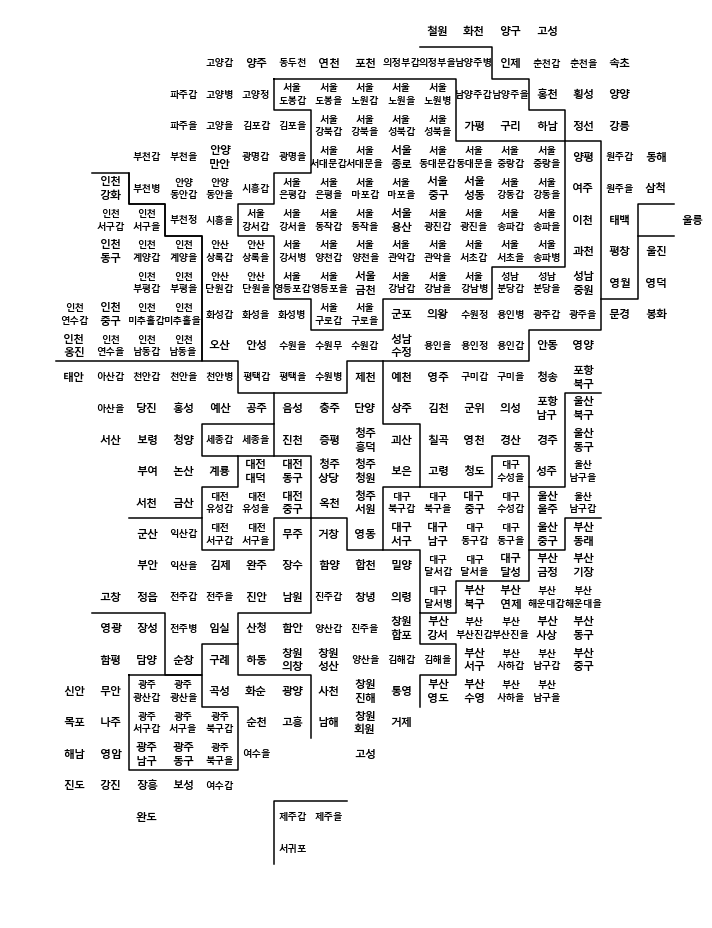

In [517]:
plt.figure(figsize=(10, 13))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [515]:
result = pd.merge(df, draw_korea, how='left', on=['ID'])
# result[result.isna().any(axis=1)]
result.head()

,광역시도,시도,구시군,선거인수,투표수,당선 정당,2등 정당,당선자 득표수,2등 득표수,계,무효투표수,기권수,ID,y,x
0,강원도,강릉시,강릉시,184371,122855,무소속,더불어민주당,49618,47088,121474,1381,61516,강릉,3,15
1,강원도,동해시태백시삼척시정선군,동해시,76543,49535,미래통합당,더불어민주당,26690,20493,48958,577,27008,동해,4,16
2,강원도,동해시태백시삼척시정선군,삼척시,58270,39729,미래통합당,더불어민주당,20685,17373,39279,450,18541,삼척,5,16
3,강원도,동해시태백시삼척시정선군,정선군,33231,21795,미래통합당,더불어민주당,11147,9632,21464,331,11436,정선,3,14
4,강원도,동해시태백시삼척시정선군,태백시,37712,24171,미래통합당,더불어민주당,13082,10029,23885,286,13541,태백,6,15


In [532]:
result['득표 차이'] = result['당선자 득표수'] - result['2등 득표수']
result['투표율'] = result['투표수'] / result['선거인수']

In [534]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = 0.0, 1.0

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(10, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

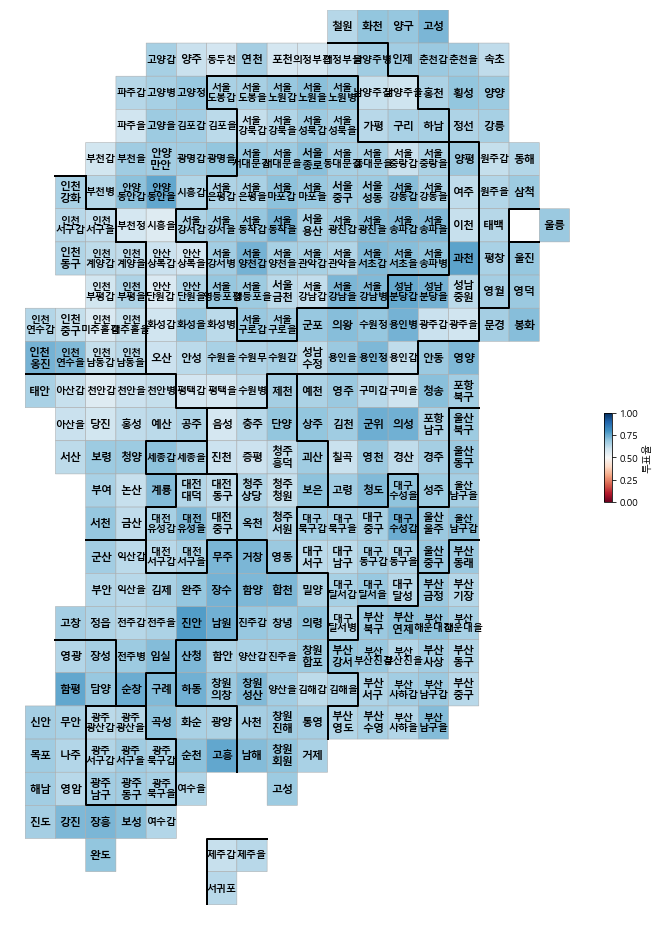

In [537]:
drawKorea('투표율', result, 'RdBu')

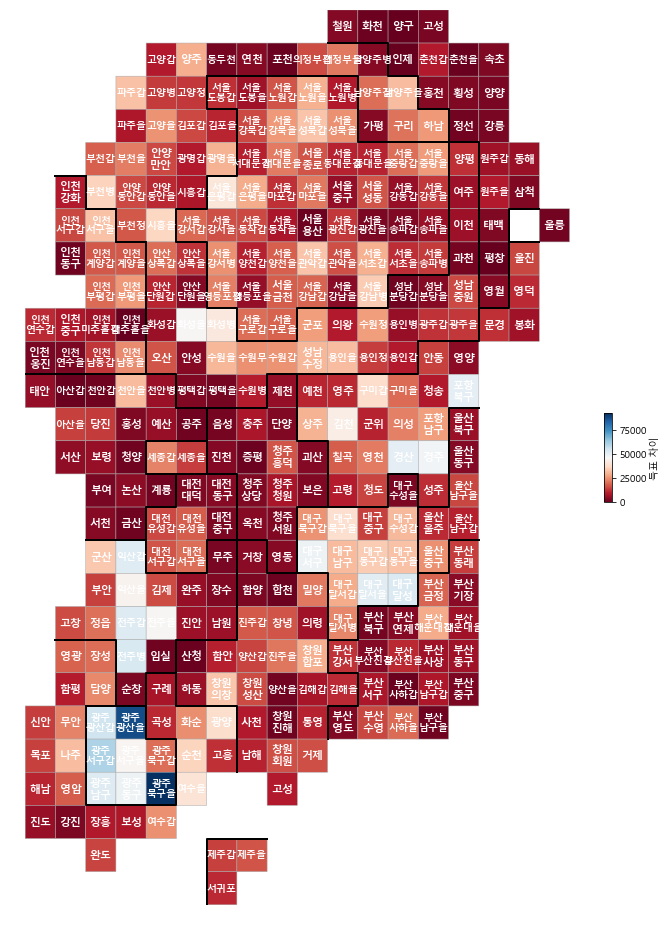

In [530]:
drawKorea('득표 차이', result, 'RdBu')